# Exercise Solutions

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

%matplotlib inline

Loading BokehJS ...

In [2]:
# categorical
#http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=4
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c']

# create a colormap from the list of colors
cmap = LinearSegmentedColormap.from_list('cmap', colors=colors)

# diverging colors
# http://colorbrewer2.org/#type=diverging&scheme=RdYlBu&n=4
div_colors = ["#0152c0", "#fe7500", "#9c00c9"]

## 1.

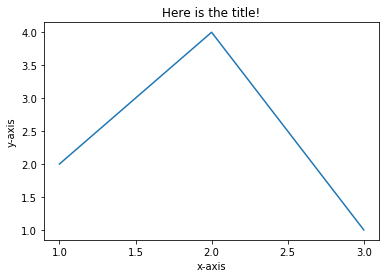

In [4]:
# 1. Write a Python program to draw a line using user-provided axis values with suitable label on the x-axis, 
# y-axis and a title.
# https://www.w3resource.com/graphics/matplotlib/basic/matplotlib-basic-exercise-2.php

# x axis values
x = [1, 2, 3]

# y axis values
y = [2, 4, 1]

# Plot lines and/or markers to the Axes.
plt.plot(x, y)

# set the number of ticks on the x-axis
plt.xticks(np.arange(1, 3.5, 0.5))
# Set the x axis label of the current axis.
plt.xlabel('x-axis')
# Set the y axis label of the current axis.
plt.ylabel('y-axis')
# Set a title 
plt.title('Here is the title!')

# Display a figure.
plt.show()

## 2.

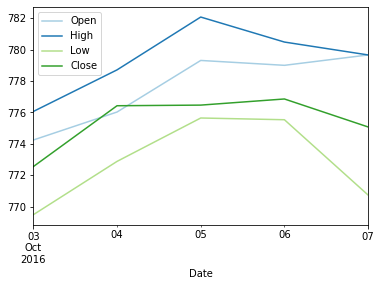

In [5]:
# 2. Write a Python program to draw line charts of the financial data of Alphabet Inc. 
# between October 3, 2016 to October 7, 2016 using the sample financial data (data/fdata.csv).
# https://www.w3resource.com/graphics/matplotlib/basic/matplotlib-basic-exercise-4.php

df = pd.read_csv('data/fdata.csv', sep=',', parse_dates=True, index_col=0)
df.plot(colormap=cmap)
plt.show()

{'Date': ['10-03-16', '10-04-16', '10-05-16', '10-06-16', '10-07-16'], 'Open': [774.25, 776.030029, 779.309998, 779.0, 779.659973], 'High': [776.065002, 778.710022, 782.070007, 780.47998, 779.659973], 'Low': [769.5, 772.890015, 775.650024, 775.539978, 770.75], 'Close': [772.559998, 776.429993, 776.469971, 776.859985, 775.080017]}


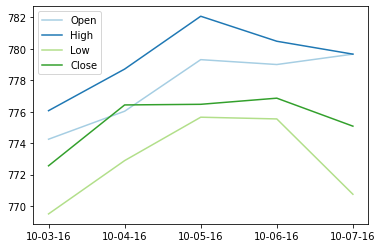

In [6]:
# exercise 2 w/o pandas
data = {}

with open('data/fdata.csv') as f:
    labels = []  # the keys of the data (header)
    c = 0
    for line in f:
        # split values in line by comma and remove last character '\n'
        values = line[:-1].split(',')
        if c == 0:  # header: create new list in the dict with the label as key
            labels = values
            # create an empty list for each key
            for v in values:
                data[v] = []
        else:  # add data to the keys
            for i, v in enumerate(values):
                # convert values to floats
                if i != 0:
                    v = float(v)
                data[labels[i]].append(v)
        c += 1

print(data)

# plot the data
for i, k in enumerate(data.keys()):
    if k != 'Date':
        plt.plot(data['Date'], data[k], label=k, color=colors[i-1])
plt.legend()
plt.show()

## 3.

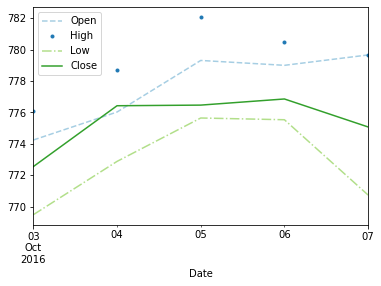

In [7]:
# 3. Change the line styles of the previous exercise to the following:
#  * Open: dashed line
#  * High: dots
#  * Low: dash dot line
#  * Close: solid line

df.plot(style=['--', '.', '-.', '-'], colormap=cmap)
plt.show()

## 4.

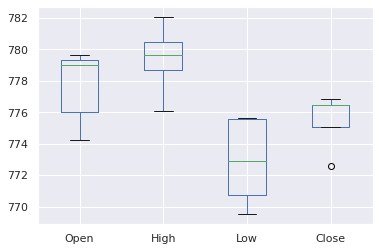

In [14]:
# 4. Create a box plot from the financial data.
df.plot.box()

## 5.

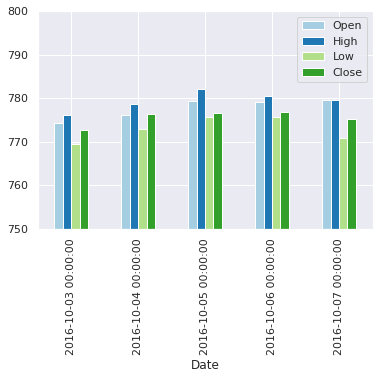

In [15]:
#5. Create a bar chart from the financial data. The y-axis should limited to values in between 750 and 800. 
# Is it a good idea to limit an axis in that way? 
# Think about consequences in the perception of the data.

df.plot.bar(ylim=[750, 800], colormap=cmap)
plt.show()

Avoid creating charts like the one above. Changing the y-axis so it does not start at 0 is always dangerous because the change in values appears much bigger than it actually is. Especially, if you compare multiple charts that all have different limits on the y-axis. Compare the chart above to the same chart that starts with 0 at the y-axis:

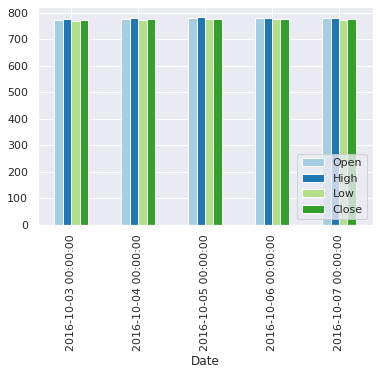

In [16]:
# the same chart where the y-axis starts at 0
# now the changes do not seem that big anymore.
df.plot.bar(colormap=cmap)
plt.legend(loc='lower right')
plt.show()

## 6.

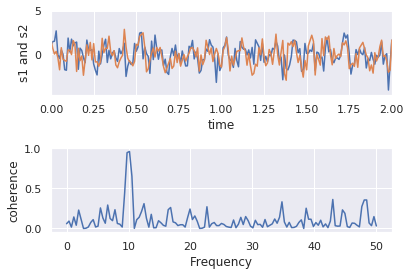

In [19]:
# 6. example from https://matplotlib.org/gallery/lines_bars_and_markers/cohere.html#sphx-glr-gallery-lines-bars-and-markers-cohere-py

# Fixing random state for reproducibility
np.random.seed(19680801)

dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2

# Two signals with a coherent part at 10Hz and a random part
s1 = np.sin(2 * np.pi * 10 * t) + nse1
s2 = np.sin(2 * np.pi * 10 * t) + nse2

fig, axs = plt.subplots(2, 1)
axs[0].plot(t, s1, t, s2)
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('time')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)

cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
axs[1].set_ylabel('coherence')

fig.tight_layout()
plt.show()

## 7.

In [23]:
# 7. example from https://bokeh.pydata.org/en/latest/docs/gallery/iris.html
#from bokeh.plotting import figure, show
from bokeh.sampledata.iris import flowers

iris_colormap = {x: div_colors[i] for i, x in enumerate(flowers.species.unique())}
iris_colormap

{'setosa': '#0152c0', 'versicolor': '#fe7500', 'virginica': '#9c00c9'}

In [26]:
iris_colors = [iris_colormap[x] for x in flowers['species']]
iris_colors

['#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#0152c0',
 '#fe7500',
 '#fe7500',
 '#fe7500',
 '#fe7500',
 '#fe7500',
 '#fe7500',
 '#fe7500',
 '#fe7500',
 '#fe7500',
 '#fe7500',
 '#fe7500',
 '#fe7500',
 '#fe7500',
 '#fe7500',
 '#fe7500',
 '#fe7500',
 '#fe7500',
 '#fe7500',
 '#fe7500',
 '#fe7500',
 '#fe7500',
 '#fe7500',
 '#fe7500',
 '#fe7500',
 '#fe7500',
 '#fe7500',
 '#fe7500',
 '#fe7500',
 '#fe7500',
 '#fe7500',
 '#fe7500',
 '#fe7500',
 '#fe7500',
 '#f

In [27]:
p = figure(title = "Iris Morphology")
p.xaxis.axis_label = 'Petal Length'
p.yaxis.axis_label = 'Petal Width'

p.circle(flowers["petal_length"], flowers["petal_width"],
         color=iris_colors, fill_alpha=0.2, size=10)

show(p)

## 8.

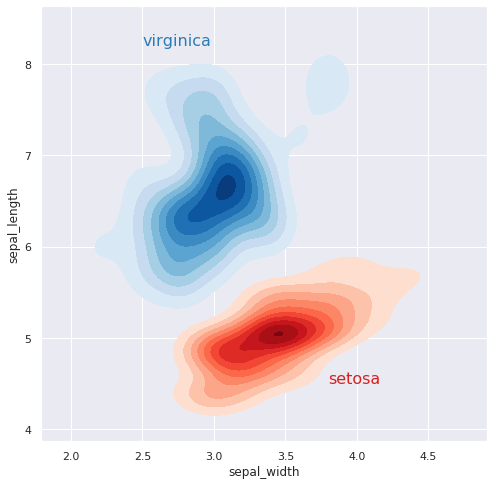

In [28]:
# 8. example from https://seaborn.pydata.org/examples/multiple_joint_kde.html
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
iris = sns.load_dataset("iris")

# Subset the iris dataset by species
setosa = iris.query("species == 'setosa'")
virginica = iris.query("species == 'virginica'")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
#ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "virginica", size=16, color=blue)
ax.text(3.8, 4.5, "setosa", size=16, color=red)
plt.show()